# Example

Consider sequences that are increasingly different. EDeN allows to turn them into vectors, whose similarity is decreasing.

Build an artificial dataset: starting from the string 'abcdefghijklmnopqrstuvwxyz', generate iteratively strings by swapping two characters at random. In this way instances are progressively more dissimilar

In [1]:
import random

def make_data(size):
    text = ''.join([str(unichr(97+i)) for i in range(26)])
    seqs = []

    def swap_two_characters(seq):
        '''define a function that swaps two characters at random positions in a string '''
        line = list(seq)
        id_i = random.randint(0,len(line)-1)
        id_j = random.randint(0,len(line)-1)
        line[id_i], line[id_j] = line[id_j], line[id_i]
        return ''.join(line)

    for i in range(size):
        text = swap_two_characters( text )
        seqs.append( text )
        print text
        
    return seqs

In [2]:
seqs = make_data(25)

abcxefghijklmnopqrstuvwdyz
abcxwfghijklmnopqrstuvedyz
ablxwfghijkcmnopqrstuvedyz
ablxwfehijkcmnopqrstuvgdyz
ablxwfehijkcmnopqrytuvgdsz
ablywfehijkcmnopqrxtuvgdsz
ablywfehijkcgnopqrxtuvmdsz
abtywfehijkcgnopqrxluvmdsz
abtywgehijkcfnopqrxluvmdsz
abtlwgehijkcfnopqrxyuvmdsz
abtlwgehijucfnopqrxykvmdsz
aktlwgehijucfnopqrxybvmdsz
aktlwgehrjucfnopqixybvmdsz
aktlegwhrjucfnopqixybvmdsz
aktligwhrjucfnopqexybvmdsz
aktligwhrjucfnopqexybvmzsd
aktldgwhrjucfnopqexybvmzsi
aktldgwhrjucfqopnexybvmzsi
aktldgwhrjucfqypnexobvmzsi
aktldgbhrjucfqypnexowvmzsi
akgldtbhrjucfqypnexowvmzsi
akgldtbhrjucfqnpyexowvmzsi
akgldtbhrjucfqnpyexowmvzsi
akgldbthrjucfqnpyexowmvzsi
akgldbthrjcufqnpyexowmvzsi


define a function that builds a graph from a string, i.e. the path graph with the characters as node labels

In [3]:
import networkx as nx

def sequence_to_graph(seq):
    '''convert a sequence into a EDeN 'compatible' graph
    i.e. a graph with the attribute 'label' for every node and edge'''
    G = nx.Graph()
    for id,character in enumerate(seq):
        G.add_node(id, label = character )
        if id > 0:
            G.add_edge(id-1, id, label = '-')
    return G

make a generator that yields graphs: generators are 'good' as they allow functional composition

In [4]:
def pre_process(iterable):
    for seq in iterable:
        yield sequence_to_graph(seq)

obtain an iterator over the sequences processed into graphs

In [5]:
%%time
graphs = pre_process(seqs)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.06 µs


compute the vector encoding of each instance in a sparse data matrix

In [6]:
%%time
from eden.graph import vectorize
X = vectorize(list(graphs), complexity=3, nbits=18,n_jobs=1)
print 'Instances: %d ; Features: %d with an avg of %d features per instance' % (X.shape[0], X.shape[1],  X.getnnz()/X.shape[0])

Instances: 25 ; Features: 262145 with an avg of 806 features per instance
CPU times: user 528 ms, sys: 48 ms, total: 576 ms
Wall time: 581 ms


compute the pairwise similarity as the dot product between the vector representations of each sequence

In [7]:
from sklearn import metrics

K=metrics.pairwise.pairwise_kernels(X, metric='linear')

visualize it as a picture is worth thousand words...

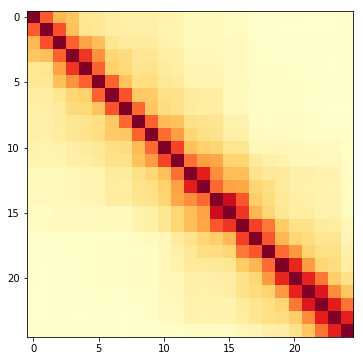

In [8]:
%matplotlib inline
import pylab as plt
plt.figure( figsize=(6,6) )
img = plt.imshow( K, interpolation='none', cmap=plt.get_cmap( 'YlOrRd' ) )
plt.show()

---